In [23]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
from datetime import datetime as dt

def plotTemp(filepath):
    plt.figure(figsize=(8,4), dpi = 100)
    colors = [(183, 101, 224), (93, 131, 212), (49, 205, 222), (36, 214, 75), (214, 125, 36), (230, 78, 192), (209, 84, 65), (0, 184, 235)]
    df = pd.read_csv(filepath)
    df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%dT%H%M%S.%f')
    time = df['Time']
    for i in range(8):
        plt.plot(np.array(time), np.array(df[f"T{i+1}"]),color = [colors[i][0]/235,colors[i][1]/235,colors[i][2]/235], label = f"T{i+1}")
    
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    #plt.ylim(0,25)
    plt.title("Temperature")
    plt.legend()
    
def plotHum(filepath):
    plt.figure(figsize=(8,4), dpi = 100)
    df = pd.read_csv(filepath)
    df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%dT%H%M%S.%f')
    time = df['Time']
    plt.plot(np.array(time), np.array(df["HUM"]),color = 'red', label = "HUM")
    plt.plot(np.array(time), np.array(df["TMP"]),color = 'blue', label = "TMP")
    plt.plot(np.array(time), np.array(df["DEW"]),color = 'black', label = "DEW")
    
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title("Humidity")
    plt.legend()
    
def plotComp(tempfile, humfile):
    df_temp = pd.read_csv(tempfile)
    df_hum = pd.read_csv(humfile)
    
    t1 = np.array(pd.to_datetime(df_temp['Time'], format='%Y%m%dT%H%M%S.%f'))
    t2 = np.array(pd.to_datetime(df_hum['Time'], format='%Y%m%dT%H%M%S.%f'))
    data1 = np.array(df_temp['T8'])
    data2 = np.array(df_hum["absHUM"])
    
    fig, ax1 = plt.subplots(figsize=(8,4), dpi = 100)
    color1 = 'tab:blue'
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Output Temperature (°C)', color=color1)
    ax1.plot(t1, data1, color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)

    ax2 = ax1.twinx() 
    
    color2 = 'tab:red'
    ax2.set_ylabel(f'Absolute Humidity (g/$m^3$)', color=color2)
    ax2.plot(t2, data2, color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)

    fig.tight_layout()  
    plt.show()


def plotPress(filepath):
    plt.figure(figsize=(8,4), dpi = 100)
    df = pd.read_csv(filepath)
    df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%dT%H%M%S.%f')
    time = df['Time']
    plt.plot(np.array(time), np.array(df["Pressure (Torr)"]),color = 'red', label = "pressure")
    
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Pressure (Torr)')
    plt.title("Pressure")
    plt.legend()

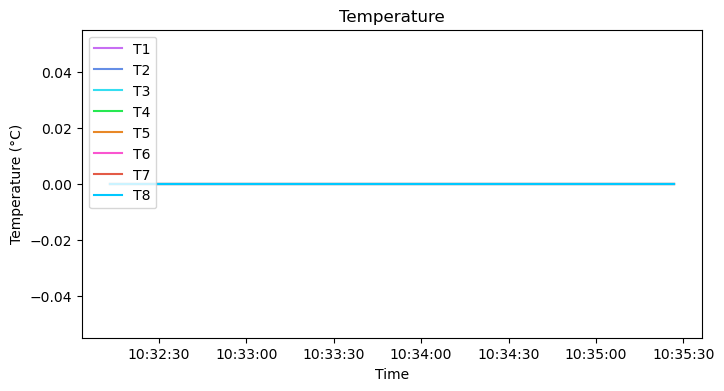

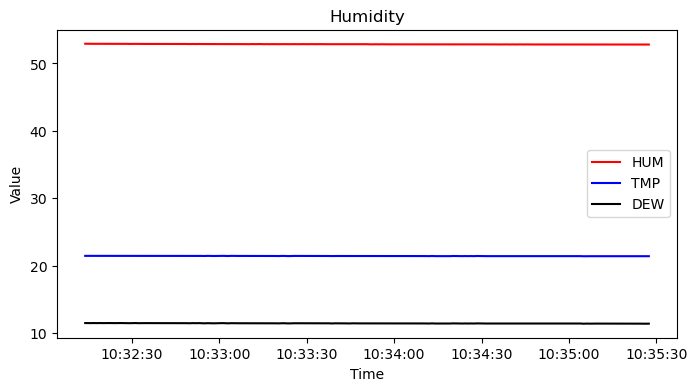

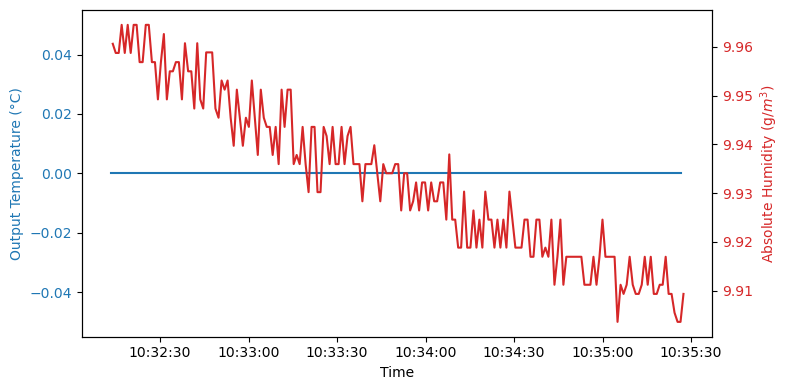

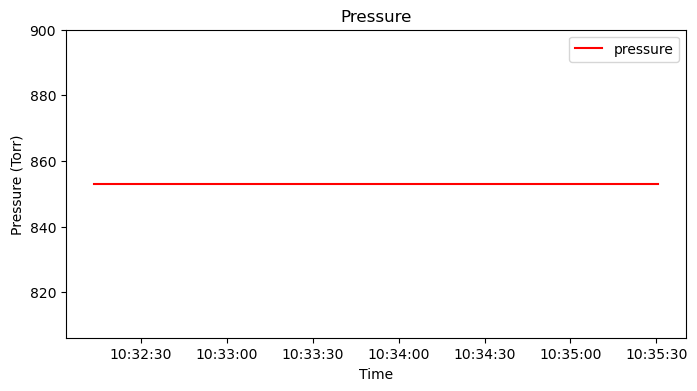

In [24]:
folderpath ='C:/Users/rga/Desktop/TempGUI/GUIfinal/'

Tempfile = folderpath+"temp_log_20240726T103213.csv"
Humfile = folderpath+"hum_log_20240726T103213.csv"
Pressfile = folderpath+"press_log_20240726T103213.csv"

plotTemp(Tempfile)   
plotHum(Humfile )
plotComp(Tempfile, Humfile)
plotPress(Pressfile)